In [85]:
# Load necessary packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
%matplotlib inline

import os
print(os.listdir("../input"))

['police_pedestrian_stops_and_vehicle_stops', 'police_pedestrian_stops_and_vehicle_stops.csv', 'police_pedestrian_stops_and_vehicle_stops_1', 'police_pedestrian_stops_and_vehicle_stops.xml', 'police_pedestrian_stops_and_vehicle_stops.dwg']


In [86]:
# load csv file into dataframe
denver_data = pd.read_csv('../input/police_pedestrian_stops_and_vehicle_stops.csv')
denver_data.head()

,MASTER_INCIDENT_NUMBER,PRIORITY_DESCRIPTION,PROBLEM,ADDRESS,CALL_CLASS,TIME_PHONEPICKUP,CALL_DISPOSITION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_NAME
0,DPD-12-0528225,P3 Public Need,Vehicle Stop,8500 W CRESTLINE AVE,2,2012-11-13 00:02:22,K - Street Check Completed,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston
1,DPD-12-0147770,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-04-11 00:22:38,Arrest Made,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston
2,DPD-12-0306079,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-10 00:29:19,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston
3,DPD-12-0331882,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-24 04:40:57,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston
4,DPD-15-0647708,P3 Public Need,Subject Stop,8500 W Crestline Ave,2,2015-11-05 00:37:02,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston


In [87]:
denver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817044 entries, 0 to 817043
Data columns (total 14 columns):
MASTER_INCIDENT_NUMBER    817044 non-null object
PRIORITY_DESCRIPTION      817044 non-null object
PROBLEM                   817044 non-null object
ADDRESS                   817044 non-null object
CALL_CLASS                817044 non-null int64
TIME_PHONEPICKUP          817044 non-null object
CALL_DISPOSITION          817044 non-null object
GEO_X                     817044 non-null float64
GEO_Y                     817044 non-null float64
GEO_LON                   817044 non-null float64
GEO_LAT                   817044 non-null float64
DISTRICT_ID               817044 non-null object
PRECINCT_ID               817044 non-null object
NEIGHBORHOOD_NAME         817044 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 87.3+ MB


There are a total of 14 columns in this data with 816708 rows.

In [88]:
# copy original dataset 
clean_data = denver_data.copy()

In [89]:
# seperate pedestrian stop and traffic stop
clean_data = clean_data.query('PROBLEM == "Vehicle Stop"')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596088 entries, 0 to 817043
Data columns (total 14 columns):
MASTER_INCIDENT_NUMBER    596088 non-null object
PRIORITY_DESCRIPTION      596088 non-null object
PROBLEM                   596088 non-null object
ADDRESS                   596088 non-null object
CALL_CLASS                596088 non-null int64
TIME_PHONEPICKUP          596088 non-null object
CALL_DISPOSITION          596088 non-null object
GEO_X                     596088 non-null float64
GEO_Y                     596088 non-null float64
GEO_LON                   596088 non-null float64
GEO_LAT                   596088 non-null float64
DISTRICT_ID               596088 non-null object
PRECINCT_ID               596088 non-null object
NEIGHBORHOOD_NAME         596088 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 68.2+ MB


In [90]:
# check to see if there are any duplicates in MASTER_INCIDENT_NUMBER
clean_data.MASTER_INCIDENT_NUMBER.nunique()

593944

In [91]:
# number of duplicates
clean_data.shape[0] - clean_data.MASTER_INCIDENT_NUMBER.nunique()

2144

In [92]:
# display duplicated data
clean_data[clean_data.duplicated(['MASTER_INCIDENT_NUMBER'], keep = False)]

,MASTER_INCIDENT_NUMBER,PRIORITY_DESCRIPTION,PROBLEM,ADDRESS,CALL_CLASS,TIME_PHONEPICKUP,CALL_DISPOSITION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_NAME
9990,DPD-11-0167514,P3 Public Need,Vehicle Stop,S SHERIDAN BLVD / W COLGATE DR,2,2011-04-16 19:00:41,T - Citation Issued,3125792.00,1664563.61,-105.053221,39.657173,4,423,Bear Valley
9991,DPD-11-0167514,P3 Public Need,Vehicle Stop,S SHERIDAN BLVD / W COLGATE DR,2,2011-04-16 19:00:41,T - Citation Issued,3125792.00,1664563.61,-105.053221,39.657173,4,423,Harvey Park South
10142,DPD-15-0636272,P3 Public Need,Vehicle Stop,W Colgate Dr / S Sheridan Blvd,2,2015-10-30 18:25:54,Warning Issued,3125792.00,1664563.61,-105.053221,39.657173,4,423,Bear Valley
10143,DPD-15-0636272,P3 Public Need,Vehicle Stop,W Colgate Dr / S Sheridan Blvd,2,2015-10-30 18:25:54,Warning Issued,3125792.00,1664563.61,-105.053221,39.657173,4,423,Harvey Park South
10144,DPD-14-0118398,P3 Public Need,Vehicle Stop,W Colgate Dr / S Sheridan Blvd,2,2014-03-07 22:55:58,Warning Issued,3125792.00,1664563.61,-105.053221,39.657173,4,423,Bear Valley
10145,DPD-14-0118398,P3 Public Need,Vehicle Stop,W Colgate Dr / S Sheridan Blvd,2,2014-03-07 22:55:58,Warning Issued,3125792.00,1664563.61,-105.053221,39.657173,4,423,Harvey Park South
10146,DPD-13-0397317,P3 Public Need,Vehicle Stop,S SHERIDAN BLVD / W COLGATE DR,2,2013-08-22 03:53:30,Warning Issued,3125792.00,1664563.61,-105.053221,39.657173,4,423,Bear Valley
10266,DPD-13-0397317,P3 Public Need,Vehicle Stop,S SHERIDAN BLVD / W COLGATE DR,2,2013-08-22 03:53:30,Warning Issued,3125792.00,1664563.61,-105.053221,39.657173,4,423,Harvey Park South
10424,DPD-16-0271051,P3 Public Need,Vehicle Stop,5200-blk W Colgate Dr,2,2016-05-01 18:20:53,T - Citation Issued,3125792.00,1664563.61,-105.053221,39.657173,4,423,Bear Valley
10425,DPD-16-0271051,P3 Public Need,Vehicle Stop,5200-blk W Colgate Dr,2,2016-05-01 18:20:53,T - Citation Issued,3125792.00,1664563.61,-105.053221,39.657173,4,423,Harvey Park South


It appears that if traffic stop happens at the border of two neighborhoods, they count it twice - will keep only first one

In [93]:
# keep first duplicated data
clean_data = clean_data[~clean_data.MASTER_INCIDENT_NUMBER.duplicated(keep = 'first')]

In [94]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593944 entries, 0 to 817043
Data columns (total 14 columns):
MASTER_INCIDENT_NUMBER    593944 non-null object
PRIORITY_DESCRIPTION      593944 non-null object
PROBLEM                   593944 non-null object
ADDRESS                   593944 non-null object
CALL_CLASS                593944 non-null int64
TIME_PHONEPICKUP          593944 non-null object
CALL_DISPOSITION          593944 non-null object
GEO_X                     593944 non-null float64
GEO_Y                     593944 non-null float64
GEO_LON                   593944 non-null float64
GEO_LAT                   593944 non-null float64
DISTRICT_ID               593944 non-null object
PRECINCT_ID               593944 non-null object
NEIGHBORHOOD_NAME         593944 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 68.0+ MB


In [95]:
# convert TIME_PHONEPICKUP to datatime objects
import datetime as datetime
clean_data['TIME_PHONEPICKUP'] = pd.to_datetime(clean_data.TIME_PHONEPICKUP)

In [96]:
# check n/a data
clean_data.isna().sum()

MASTER_INCIDENT_NUMBER    0
PRIORITY_DESCRIPTION      0
PROBLEM                   0
ADDRESS                   0
CALL_CLASS                0
TIME_PHONEPICKUP          0
CALL_DISPOSITION          0
GEO_X                     0
GEO_Y                     0
GEO_LON                   0
GEO_LAT                   0
DISTRICT_ID               0
PRECINCT_ID               0
NEIGHBORHOOD_NAME         0
dtype: int64

In [97]:
# convert CALL_DISPOSITION to str
clean_data['CALL_DISPOSITION'] = clean_data.CALL_DISPOSITION.astype(str)

In [98]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593944 entries, 0 to 817043
Data columns (total 14 columns):
MASTER_INCIDENT_NUMBER    593944 non-null object
PRIORITY_DESCRIPTION      593944 non-null object
PROBLEM                   593944 non-null object
ADDRESS                   593944 non-null object
CALL_CLASS                593944 non-null int64
TIME_PHONEPICKUP          593944 non-null datetime64[ns]
CALL_DISPOSITION          593944 non-null object
GEO_X                     593944 non-null float64
GEO_Y                     593944 non-null float64
GEO_LON                   593944 non-null float64
GEO_LAT                   593944 non-null float64
DISTRICT_ID               593944 non-null object
PRECINCT_ID               593944 non-null object
NEIGHBORHOOD_NAME         593944 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 68.0+ MB


In [99]:
# add columns indicating the hour, day, month, and year each stop occurs
clean_data['HOUR_REPORTED'] = pd.DatetimeIndex(clean_data['TIME_PHONEPICKUP']).hour
clean_data['WEEKDAY_REPORTED'] = pd.DatetimeIndex(clean_data['TIME_PHONEPICKUP']).weekday
clean_data['MONTH_REPORTED'] = pd.DatetimeIndex(clean_data['TIME_PHONEPICKUP']).month
clean_data['YEAR_REPORTED'] = pd.DatetimeIndex(clean_data['TIME_PHONEPICKUP']).year

In [100]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593944 entries, 0 to 817043
Data columns (total 18 columns):
MASTER_INCIDENT_NUMBER    593944 non-null object
PRIORITY_DESCRIPTION      593944 non-null object
PROBLEM                   593944 non-null object
ADDRESS                   593944 non-null object
CALL_CLASS                593944 non-null int64
TIME_PHONEPICKUP          593944 non-null datetime64[ns]
CALL_DISPOSITION          593944 non-null object
GEO_X                     593944 non-null float64
GEO_Y                     593944 non-null float64
GEO_LON                   593944 non-null float64
GEO_LAT                   593944 non-null float64
DISTRICT_ID               593944 non-null object
PRECINCT_ID               593944 non-null object
NEIGHBORHOOD_NAME         593944 non-null object
HOUR_REPORTED             593944 non-null int64
WEEKDAY_REPORTED          593944 non-null int64
MONTH_REPORTED            593944 non-null int64
YEAR_REPORTED             593944 non-null int64


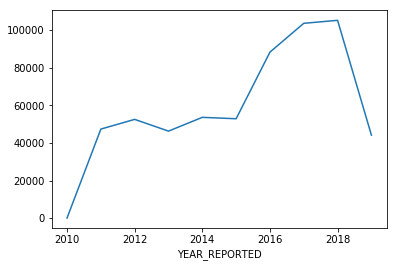

In [101]:
clean_data['YEAR_REPORTED'].groupby(clean_data.YEAR_REPORTED).agg('count').plot('line')

In [102]:
# 2010 & 2019 does not have sufficient data - data starting in 2010 12.31 and ending in with June
clean_data.sort_values(by = 'TIME_PHONEPICKUP').tail()

,MASTER_INCIDENT_NUMBER,PRIORITY_DESCRIPTION,PROBLEM,ADDRESS,CALL_CLASS,TIME_PHONEPICKUP,CALL_DISPOSITION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_NAME,HOUR_REPORTED,WEEKDAY_REPORTED,MONTH_REPORTED,YEAR_REPORTED
811738,DPD-19-0400147,P3 Public Need,Vehicle Stop,I25 Hwy_SB / 15th St,2,2019-06-27 02:55:08.000001,T - Citation Issued,3137703.60,1701053.11,-105.010216,39.757176,1,113,Highland,2,3,6,2019
812775,DPD-19-0400148,P3 Public Need,Vehicle Stop,I70 Hwy_WB / I25 Hwy_NB,2,2019-06-27 02:59:33.000000,T - Citation Issued,3143567.01,1709476.24,-104.989193,39.780210,1,112,Globeville,2,3,6,2019
811518,DPD-19-0400155,P3 Public Need,Vehicle Stop,I70 Hwy_WB / I25 Hwy_NB,2,2019-06-27 03:08:30.000000,T - Citation Issued,3143567.01,1709476.24,-104.989193,39.780210,1,112,Globeville,3,3,6,2019
813628,DPD-19-0400167,P3 Public Need,Vehicle Stop,I70 Hwy_WB / I25 Hwy_NB,2,2019-06-27 03:21:26.000000,T - Citation Issued,3143567.01,1709476.24,-104.989193,39.780210,1,112,Globeville,3,3,6,2019
813617,DPD-19-0400191,P3 Public Need,Vehicle Stop,I25 Hwy_SB / 15th St,2,2019-06-27 03:56:22.000000,None,3137703.60,1701053.11,-105.010216,39.757176,1,113,Highland,3,3,6,2019


In [103]:
clean_data.sort_values(by = 'TIME_PHONEPICKUP').head()

,MASTER_INCIDENT_NUMBER,PRIORITY_DESCRIPTION,PROBLEM,ADDRESS,CALL_CLASS,TIME_PHONEPICKUP,CALL_DISPOSITION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_NAME,HOUR_REPORTED,WEEKDAY_REPORTED,MONTH_REPORTED,YEAR_REPORTED
223696,DPD-10-0640820,P3 Public Need,Vehicle Stop,1000 N BROADWAY ST,2,2010-12-31 00:40:37.000000,T - Citation Issued,3144169.13,1691934.18,-104.987403,39.732045,6,611,Civic Center,0,4,12,2010
637852,DPD-10-0640858,P3 Public Need,Vehicle Stop,N CHAMBERS RD / E 53RD AVE,2,2010-12-31 01:21:07.000000,Warning Issued,3193971.44,1713505.24,-104.809753,39.790355,5,522,Gateway - Green Valley Ranch,1,4,12,2010
223627,DPD-10-0640882,P3 Public Need,Vehicle Stop,W 10TH AVE / N CHEROKEE ST,2,2010-12-31 01:55:39.000000,Quit,3142973.52,1691930.37,-104.991654,39.732053,6,611,Civic Center,1,4,12,2010
52387,DPD-10-0640885,P3 Public Need,Vehicle Stop,4400 E JEWELL AVE,2,2010-12-31 01:59:23.000000,Warning Issued,3158871.78,1673820.19,-104.935529,39.682079,3,322,Virginia Village,1,4,12,2010
71986,DPD-10-0640897,P3 Public Need,Vehicle Stop,1500-ALBION S ASH ST,2,2010-12-31 02:12:09.000001,T - Citation Issued,3158059.24,1676454.28,-104.938358,39.689324,3,322,Virginia Village,2,4,12,2010


In [104]:
# Exclude 2010 and 2019 rows to display better plots
clean_data = clean_data[(clean_data.YEAR_REPORTED != 2010) & (clean_data.YEAR_REPORTED != 2019)]

In [105]:
clean_data.YEAR_REPORTED.value_counts()

2018    105177
2017    103599
2016     88284
2014     53607
2015     52863
2012     52524
2011     47370
2013     46282
Name: YEAR_REPORTED, dtype: int64

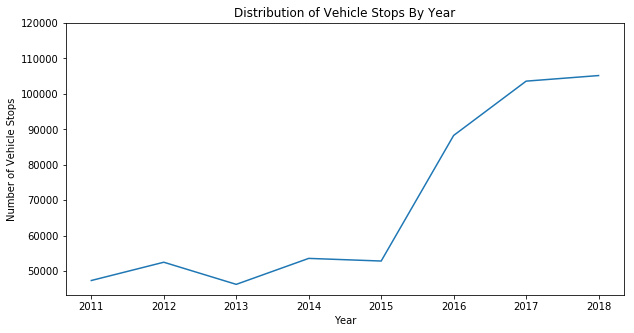

In [106]:
plt.figure(figsize =[10,5])
clean_data['YEAR_REPORTED'].groupby(clean_data.YEAR_REPORTED).agg('count').plot('line')
plt.xlabel('Year')
plt.ylabel('Number of Vehicle Stops')
plt.title('Distribution of Vehicle Stops By Year')
plt.ylim(top = 120000)
plt.show()

According to the above graph, the total number of vehicle stops engaged by Denver Police Department has been increasing since 2013 with a significant uptick in 2015.

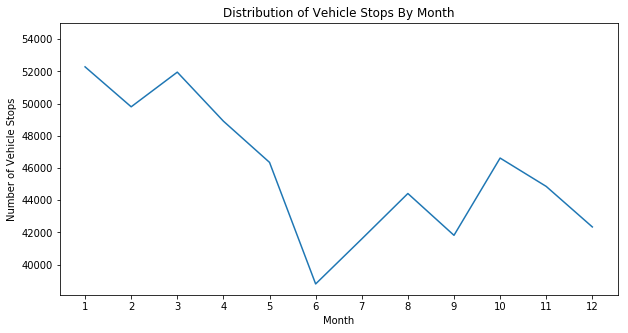

In [107]:
plt.figure(figsize =[10,5])
clean_data['MONTH_REPORTED'].groupby(clean_data.MONTH_REPORTED).agg('count').plot('line')
plt.xlabel('Month')
plt.xticks(range(1,13))
plt.ylabel('Number of Vehicle Stops')
plt.title('Distribution of Vehicle Stops By Month')
plt.ylim(top = 55000)
plt.show()

Baed on the graph above, It appears that vehicle stops are more common during the winter than the summer in Denver.

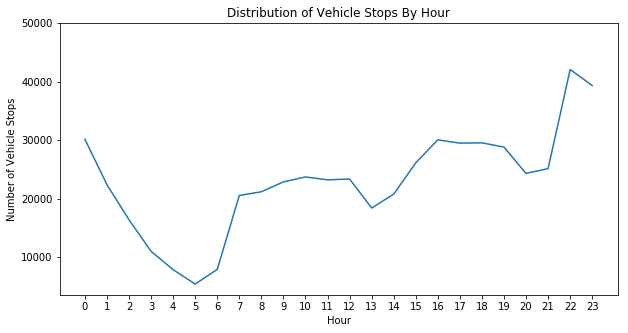

In [108]:
plt.figure(figsize =[10,5])
clean_data['HOUR_REPORTED'].groupby(clean_data.HOUR_REPORTED).agg('count').plot('line')
plt.xlabel('Hour')
plt.xticks(range(0,24))
plt.ylabel('Number of Vehicle Stops')
plt.title('Distribution of Vehicle Stops By Hour')
plt.ylim(top = 50000)
plt.show()

It appears that most vehicle stops occus between 8 am and 8 pm with significant uptick late at night and noticeable dip after midnight. 

(0.0, 35000)

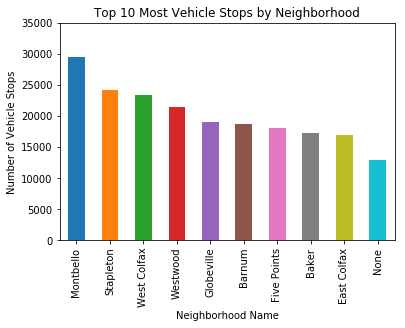

In [109]:
# Top 10 Most Vehicle Stops by Neighborhood
clean_data['NEIGHBORHOOD_NAME'].value_counts().nlargest(10).plot(kind = 'bar')
plt.title('Top 10 Most Vehicle Stops by Neighborhood')
plt.xlabel('Neighborhood Name')
plt.ylabel('Number of Vehicle Stops')
plt.ylim(top = 35000)

(0.0, 225000)

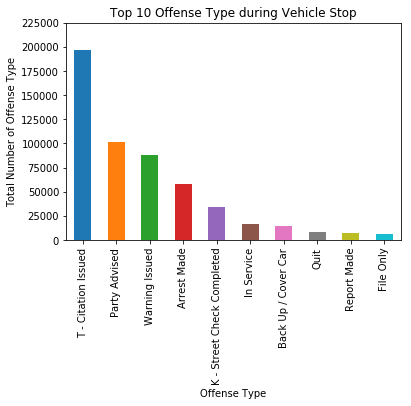

In [110]:
# Top 10 Offense Type 
clean_data['CALL_DISPOSITION'].value_counts().nlargest(10).plot(kind = 'bar')
plt.title('Top 10 Offense Type during Vehicle Stop')
plt.xlabel('Offense Type')
plt.ylabel('Total Number of Offense Type')
plt.ylim(top = 225000)

**Offense Type through Various Timeframe**

In [111]:
temp = clean_data[clean_data['CALL_DISPOSITION'].isin(clean_data['CALL_DISPOSITION'].value_counts().nlargest(10).index)]
temp.head()

,MASTER_INCIDENT_NUMBER,PRIORITY_DESCRIPTION,PROBLEM,ADDRESS,CALL_CLASS,TIME_PHONEPICKUP,CALL_DISPOSITION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_NAME,HOUR_REPORTED,WEEKDAY_REPORTED,MONTH_REPORTED,YEAR_REPORTED
0,DPD-12-0528225,P3 Public Need,Vehicle Stop,8500 W CRESTLINE AVE,2,2012-11-13 00:02:22,K - Street Check Completed,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,0,1,11,2012
14,DPD-18-0042300,P3 Public Need,Vehicle Stop,8500 W Crestline Ave,2,2018-01-18 12:13:31,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,12,3,1,2018
15,DPD-12-0552499,P3 Public Need,Vehicle Stop,8500 W CRESTLINE AVE,2,2012-11-29 00:25:01,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,0,3,11,2012
31,DPD-15-0402402,P3 Public Need,Vehicle Stop,8500 W Crestline Ave,2,2015-07-17 02:31:57,File Only,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2,4,7,2015
38,DPD-15-0399895,P3 Public Need,Vehicle Stop,8500 W Crestline Ave,2,2015-07-15 22:42:14,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,22,2,7,2015


Text(0.5, 1.0, 'Offense Types over the Years')

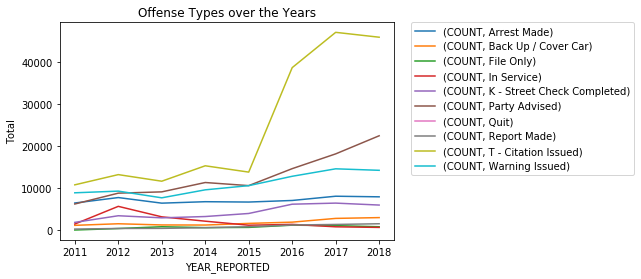

In [112]:
temp_year = temp[['YEAR_REPORTED','CALL_DISPOSITION']].groupby([temp.YEAR_REPORTED, temp.CALL_DISPOSITION]).agg('count')
temp_year = temp_year.drop(labels ='YEAR_REPORTED', axis = 1)
temp_year.columns = ['COUNT']
temp_year = temp_year.unstack(level = 1)
temp_year.plot(kind = 'line')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Total')
plt.title('Offense Types over the Years')

Citation Issued offense type gained a significant uptick in 2015, as well as other offense types appears to be steadily increasing over time

In [113]:
temp_month = temp[['MONTH_REPORTED','CALL_DISPOSITION']].groupby([temp.MONTH_REPORTED, temp.CALL_DISPOSITION]).agg('count')
temp_month.head()

MONTH_REPORTED  CALL_DISPOSITION
MONTH_REPORTED CALL_DISPOSITION                                            
1              Arrest Made                           5592              5592
               Back Up / Cover Car                   1432              1432
               File Only                              599               599
               In Service                            1532              1532
               K - Street Check Completed            3825              3825

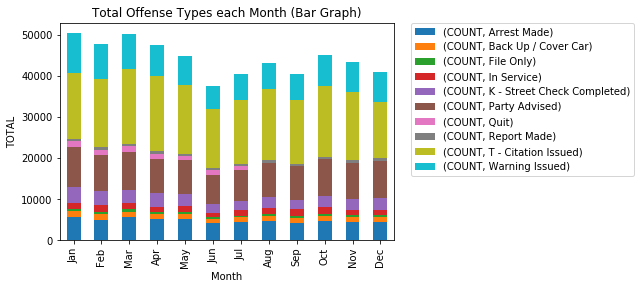

In [114]:
#temp_month = temp[['MONTH_REPORTED','CALL_DISPOSITION']].groupby([temp.MONTH_REPORTED, temp.CALL_DISPOSITION]).agg('count')
temp_month = temp_month.drop(labels = 'MONTH_REPORTED', axis = 1)
temp_month.columns = ['COUNT']
temp_month = temp_month.unstack(level = 1)
ax = temp_month.plot(kind = 'bar', stacked = True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Total Offense Types each Month (Bar Graph)')
plt.xlabel('Month')
plt.ylabel('TOTAL')
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.show()

<Figure size 720x720 with 0 Axes>

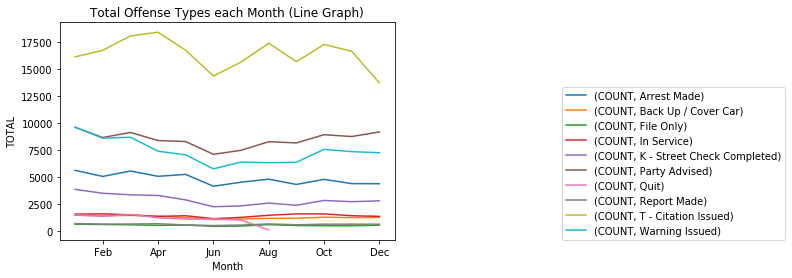

In [115]:
temp_month = temp[['MONTH_REPORTED','CALL_DISPOSITION']].groupby([temp.MONTH_REPORTED, temp.CALL_DISPOSITION]).agg('count')
temp_month = temp_month.drop(labels = 'MONTH_REPORTED', axis = 1)
temp_month.columns = ['COUNT']
temp_month = temp_month.unstack(level = 1)
plt.figure(figsize=[10,10])
ax = temp_month.plot(kind = 'line')
plt.legend(loc=(1.5,0))
plt.title('Total Offense Types each Month (Line Graph)')
plt.xlabel('Month')
plt.ylabel('TOTAL')
ax.set_xticklabels(('','Feb','Apr','Jun','Aug','Oct','Dec'))
plt.show()

Based on the above graphics, it seems majority of offense types are most common between winter and spring season. Number of traffic stops appear to decline going into summer then kicks back up starting June

In [116]:
temp.WEEKDAY_REPORTED.value_counts()

3    83500
4    82341
2    82237
1    81320
0    74984
5    66940
6    59945
Name: WEEKDAY_REPORTED, dtype: int64

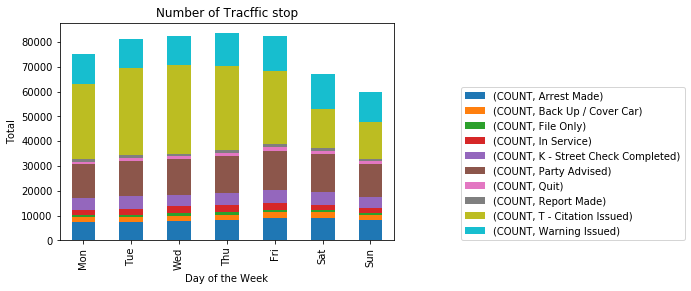

In [117]:
temp_weekday = temp[['WEEKDAY_REPORTED','CALL_DISPOSITION']].groupby([temp.WEEKDAY_REPORTED, temp.CALL_DISPOSITION]).agg('count')
temp_weekday = temp_weekday.drop(labels = 'WEEKDAY_REPORTED', axis =1)
temp_weekday.columns = ['COUNT']
temp_weekday = temp_weekday.unstack(level=1)
ax = temp_weekday.plot(kind = 'bar', stacked = True)
ax.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))
plt.legend(loc=(1.2,0))
plt.xlabel('Day of the Week')
plt.ylabel('Total')
plt.title('Number of Tracffic stop')
plt.show()

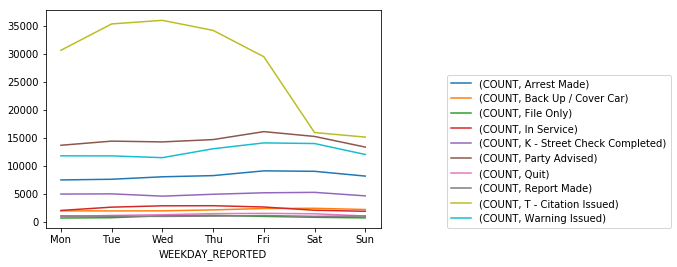

In [118]:
temp_weekday = temp[['WEEKDAY_REPORTED','CALL_DISPOSITION']].groupby([temp.WEEKDAY_REPORTED, temp.CALL_DISPOSITION]).agg('count')
temp_weekday = temp_weekday.drop(labels = 'WEEKDAY_REPORTED', axis =1)
temp_weekday.columns = ['COUNT']
temp_weekday = temp_weekday.unstack(level=1)
ax = temp_weekday.plot(kind = 'line')
ax.set_xticklabels(('','Mon','Tue','Wed','Thu','Fri','Sat','Sun'))
plt.legend(loc=(1.2,0))
plt.show()

Interestingly, majority of traffic stops peaks during week days espcially Tuesday through Thursday. Then decrease significantly going into weekend

In [119]:
temp_heat = denver_data[denver_data['NEIGHBORHOOD_NAME'].isin(denver_data['NEIGHBORHOOD_NAME'].value_counts().nlargest(10).index)]

## Heat Maps

In [120]:
# create a seperate dataset for data after 2015
temp_recent = clean_data[clean_data['YEAR_REPORTED'] >= 2015]
temp_recent.YEAR_REPORTED.value_counts()

2018    105177
2017    103599
2016     88284
2015     52863
Name: YEAR_REPORTED, dtype: int64

In [121]:
# create a function to generate heatmaps using the provided latitude and longitude coordinates
# the function parameters filter temp_recent by its columns and pass in a tuple of (column_name, column_value) and it will create a heatmap with the entries that satisfy the condition
def heatmap_creator(*args):
    temp = temp_recent
    # filter based on the provided parameters
    for item in args:
        a,b = item
        temp = temp[temp[a]==b]
        print(str(a)+': '+str(b))
    hm_prep=temp[['GEO_LAT','GEO_LON']].as_matrix()
    m = folium.Map(location=[39.73,-104.90], tiles='Stamen Toner',zoom_start=11, control_scale=True)
    m.add_children(plugins.HeatMap(hm_prep,radius=15))
    return display(m)

In [122]:
# In what area citiations are issued most in 2018?
heatmap_creator(('CALL_DISPOSITION', 'T - Citation Issued'),('YEAR_REPORTED', 2018))

CALL_DISPOSITION: T - Citation Issued
YEAR_REPORTED: 2018


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  if sys.path[0] == '':


In [83]:
heatmap_creator(('CALL_DISPOSITION', 'Arrest Made'),('YEAR_REPORTED', 2018))

CALL_DISPOSITION : Arrest Made
YEAR_REPORTED : 2018


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  if sys.path[0] == '':


Those are a few sample of how to use the heatmap_creator function.